In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
%matplotlib nbagg
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas_datareader as pdr
%matplotlib inline 

In [3]:
#finance.yahoo.comから株価のデータを取得
from pandas_datareader import data, wb
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month  , end.day )  #データの取得期間の決定
#toyota = data.DataReader('7203', 'yahoo', start , end)          #トヨタ
#Mitsui= data.DataReader('8031', 'yahoo', start , end)                #三井物産
#Mitsubishi = data.DataReader('8058', 'yahoo', start , end)           #三菱商事
toyota     = pdr.stooq.StooqDailyReader('7203.jp',start,end).read().sort_values(by='Date',ascending=True)
Mitsui     = pdr.stooq.StooqDailyReader('8031.jp',start,end).read().sort_values(by='Date',ascending=True)
Mitsubishi = pdr.stooq.StooqDailyReader('8058.jp',start,end).read().sort_values(by='Date',ascending=True)
apple = pdr.DataReader('AAPL','yahoo',start,end) 
msft = pdr.DataReader('MSFT','yahoo',start,end) 
hpq = pdr.DataReader('HPQ', 'yahoo',start,end) 
nikkei = pdr.DataReader('^N225','yahoo',start,end) 
sp500 = pdr.DataReader('^GSPC','yahoo',start,end)
# http://stocks.finance.yahoo.co.jp から好きな銘柄の数字4桁のコードを選択
toyota.head()                #データの初めの5つを出力

Open    High     Low   Close    Volume
Date                                                
2002-03-22  684.14  698.43  671.63  671.63  32554180
2002-03-25  669.84  676.99  659.13  673.42  21840695
2002-03-26  662.70  671.63  653.77  660.91  19108160
2002-03-27  666.27  680.56  660.91  669.84  24874980
2002-03-28  676.99  685.92  671.63  682.35  25795900

In [3]:
# 上のセルを実行してもYahooのデータが読み込めないときはこのセルを実行する
def read_yahoo_data(fname):
    return pd.read_csv(fname, index_col=0, na_values="null").dropna()
toyota     = read_yahoo_data('./yahoo_finance/TM.csv')
Mitsui     = read_yahoo_data('./yahoo_finance/MITSY.csv')
Mitsubishi = read_yahoo_data('./yahoo_finance/MTU.csv')
apple      = read_yahoo_data('./yahoo_finance/AAPL.csv')
msft       = read_yahoo_data('./yahoo_finance/MSFT.csv')
hpq        = read_yahoo_data('./yahoo_finance/HPQ.csv')
nikkei     = read_yahoo_data('./yahoo_finance/^N225.csv')
sp500      = read_yahoo_data('./yahoo_finance/^GSPC.csv')
toyota.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-06-27  104.980003  105.029999  104.480003  104.540001  104.540001   
2017-06-28  104.989998  105.349998  104.769997  105.309998  105.309998   
2017-06-29  105.120003  105.120003  103.839996  104.339996  104.339996   
2017-07-03  105.800003  106.339996  105.650002  106.029999  106.029999   
2017-07-05  108.150002  108.779999  108.099998  108.529999  108.529999   

              Volume  
Date                  
2017-06-27  218900.0  
2017-06-28  193300.0  
2017-06-29  182700.0  
2017-07-03  165700.0  
2017-07-05  493178.0

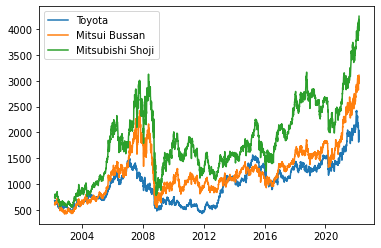

In [4]:
#株価データの可視化
for stock,lbl in zip([toyota,Mitsui,Mitsubishi],['Toyota','Mitsui Bussan','Mitsubishi Shoji']):
    dates,price = pd.to_datetime(stock.index), stock['Close']
    plt.plot(dates, price,label=lbl)
plt.legend()
plt.show()

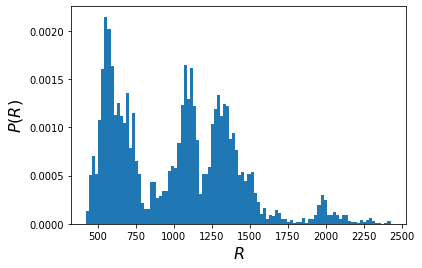

In [5]:
#ヒストグラムの作成
R = toyota['Close']                          # R に株価を格納
plt.hist(R, bins=100,density=True) 
plt.xlabel(r'$R$', fontsize=16)
plt.ylabel(r'$P(R)$', fontsize=16)
plt.show() 

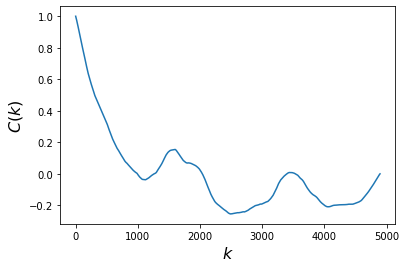

In [6]:
#平均の計算
N = len(R)
sum  =0
for i in range(N):
    sum = sum + R[i] 
ave = sum/N 

#自己相関関数
def auto_correlate(dt):
    cor = np.correlate(dt,dt,mode="full")
    return cor[N-1:]
corr = np.zeros(N)
corr=auto_correlate(R - ave)/N
plt.plot(corr/corr[0])
plt.xlabel(r'$k$', fontsize=16)
plt.ylabel(r'$C(k)$', fontsize=16)
plt.show()

0.15665283203125 15.678579448347602


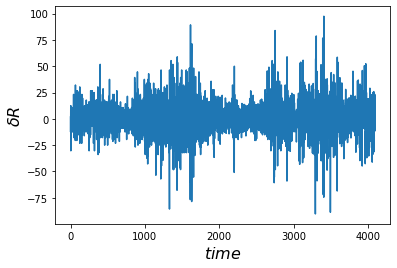

In [7]:
# 日ごとの株価変化"dR"を見てみよう

N = 4096                                                                   #株価偏差のデータ数　N = (2のべき乗 )にする。のちのフーリエ変換のため
dR = np.zeros(N)

sum = 0
for i in range(N):
    dR[i] = R[i +1] - R[i]                          
    sum = sum + dR[i]                                             
ave0 = sum/N                                                           #平均の計算

dmy_sum = 0
for i in range(N):
    dmy_sum = dmy_sum + (dR[i] - ave0) ** 2
std = ( dmy_sum /N )**0.5                                    #標準偏差の計算

plt.plot(dR)
plt.xlabel(r'$time$', fontsize=16)
plt.ylabel(r'$\delta R$', fontsize=16)
#print(len(dR))
print(ave0,std)

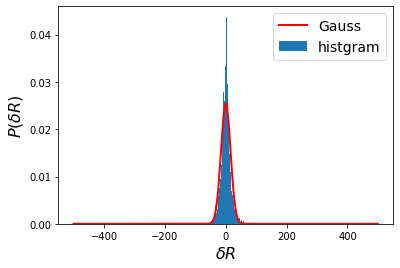

In [10]:
#株価変化のヒストグラム
plt.hist(dR, bins=100,density=True)    # Rに格納された乱数の分布を100本の棒グラフにする．さらに総面積が1になるよう規格化
x = np.arange(-500, 500, 0.01)           # -500から+500の範囲を間隔0.01で刻み，配列xに保存
y = np.exp(-(x-ave0)**2/2/std**2)/np.sqrt(2*np.pi*std**2) # 配列xと同じ数だけ正規分布の理論値を配列yに保存
plt.plot(x, y, lw=2, color='r')                 # x vs. yを線幅2の赤い線で描く
plt.xlabel(r'$\delta R$', fontsize=16)
plt.ylabel(r'$P(\delta R)$', fontsize=16)
plt.legend([r'Gauss',r'histgram'], fontsize=14)

plt.show()                           # 上記のグラフをまとめて1つの図に出力

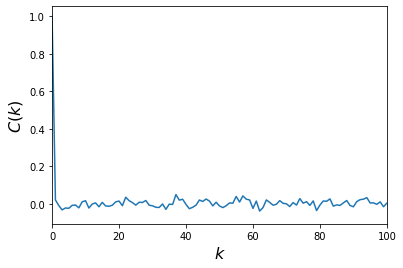

In [11]:
#自己相関関数
def auto_correlate(dt):
    cor = np.correlate(dt,dt,mode="full")
    return cor[N - 1:]
corr = np.zeros(N)
corr=auto_correlate(dR - ave0)/N
plt.plot(corr/corr[0])
plt.xlim(0,100)
#plt.ylim(-2000,5000)
plt.xlabel(r'$k$', fontsize=16)
plt.ylabel(r'$C(k)$', fontsize=16)
plt.show()
#print(dR)